<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Launch Sites Locations Analysis with Folium**


The launch success rate may depend on many factors such as payload mass, orbit type, and so on. It may also depend on the location and proximities of a launch site, i.e., the initial position of rocket trajectories. Finding an optimal location for building a launch site certainly involves many factors and hopefully we could discover some of the factors by analyzing the existing launch site locations.


In the previous exploratory data analysis labs, you have visualized the SpaceX launch dataset using `matplotlib` and `seaborn` and discovered some preliminary correlations between the launch site and success rates. In this lab, you will be performing more interactive visual analytics using `Folium`.


## Objectives


This lab contains the following tasks:

*   **TASK 1:** Mark all launch sites on a map
*   **TASK 2:** Mark the success/failed launches for each site on the map
*   **TASK 3:** Calculate the distances between a launch site to its proximities

After completed the above tasks, you should be able to find some geographical patterns about launch sites.


Let's first import required Python packages for this lab:


In [45]:
#import piplite
#await piplite.install(['folium'])
#await piplite.install(['pandas'])

In [46]:
import folium
import pandas as pd
import requests
import io
from haversine import haversine

In [47]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon
# Import IPython display plugin
from IPython.display import Image, display

If you need to refresh your memory about folium, you may download and refer to this previous folium lab:


[Generating Maps with Python](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module\_3/DV0101EN-3-5-1-Generating-Maps-in-Python-py-v2.0.ipynb)


First, let's try to add each site's location on a map using site's latitude and longitude coordinates


The following dataset with the name `spacex_launch_geo.csv` is an augmented dataset with latitude and longitude added for each site.


In [48]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'
response = requests.get(URL)
response.raise_for_status()  # Check if the request was successful

# Read the CSV file into a pandas DataFrame
spacex_csv_file = io.BytesIO(response.content)
spacex_df = pd.read_csv(spacex_csv_file)

# Display the DataFrame
print(spacex_df.head())

   Flight Number        Date Time (UTC) Booster Version  Launch Site  \
0              1  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1              2  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2              3  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3              4  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4              5  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                             Payload  Payload Mass (kg)  \
0               Dragon Spacecraft Qualification Unit                0.0   
1  Dragon demo flight C1, two CubeSats,  barrel o...                0.0   
2                             Dragon demo flight C2+              525.0   
3                                       SpaceX CRS-1              500.0   
4                                       SpaceX CRS-2              677.0   

       Orbit         Customer        Landing Outcome  class        Lat  \
0        LEO           SpaceX  Failure   (

Now, you can take a look at what are the coordinates for each site.


In [49]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

Launch Site        Lat        Long
0   CCAFS LC-40  28.562302  -80.577356
1  CCAFS SLC-40  28.563197  -80.576820
2    KSC LC-39A  28.573255  -80.646895
3   VAFB SLC-4E  34.632834 -120.610745

Above coordinates are just plain numbers that can not give you any intuitive insights about where are those launch sites. If you are very good at geography, you can interpret those numbers directly in your mind. If not, that's fine too. Let's visualize those locations by pinning them on a map.


We first need to create a folium `Map` object, with an initial center location to be NASA Johnson Space Center at Houston, Texas.


In [50]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

We could use `folium.Circle` to add a highlighted circle area with a text label on a specific coordinate. For example,


In [51]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

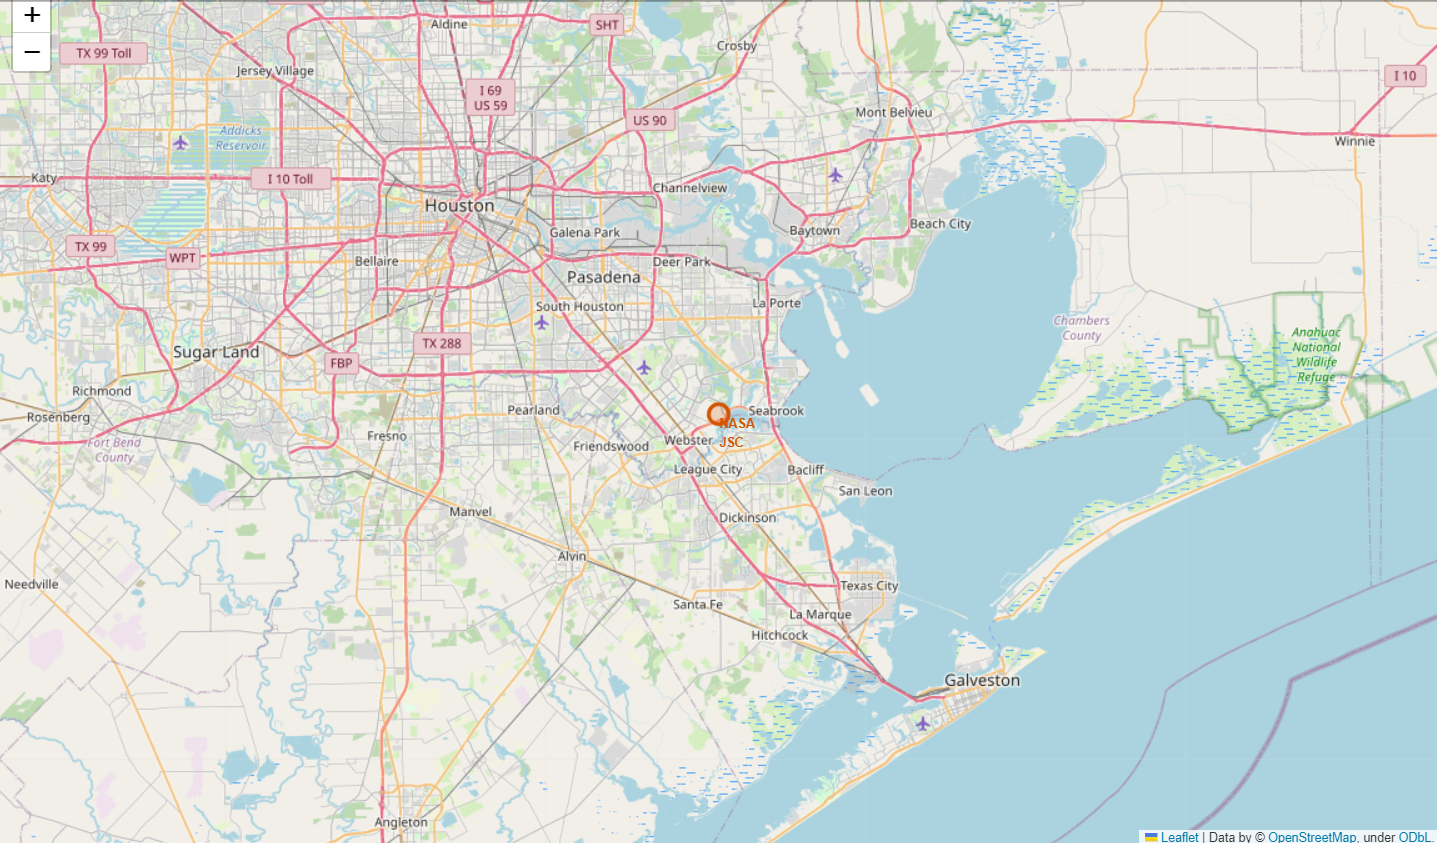

In [52]:
# Display the folium map image (for view in GitHub)
display(Image(filename='FoliumScreenshots/Screenshot 2024-08-07 130505.png'))

and you should find a small yellow circle near the city of Houston and you can zoom-in to see a larger circle.


Now, let's add a circle for each launch site in data frame `launch_sites`


An example of folium.Circle:


`folium.Circle(coordinate, radius=1000, color='#000000', fill=True).add_child(folium.Popup(...))`


An example of folium.Marker:


`folium.map.Marker(coordinate, icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'label', ))`


In [53]:
import folium
from folium.features import DivIcon

# Assuming your DataFrame is named 'your_dataframe'
# Replace 'your_dataframe' with the actual name of your DataFrame

# Initialize your map (assuming nasa_coordinate is already defined)
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)

# Iterate through the DataFrame
for index, row in launch_sites_df.iterrows():
    # Extract the latitude and longitude
    lat = row['Lat']
    lon = row['Long']
    # Extract the launch site name
    launch_site = row['Launch Site']

    # Create a text marker with the launch site name
    folium.map.Marker(
        [lat, lon],
        icon=DivIcon(
            icon_size=(20,20),
            icon_anchor=(0,0),
            html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % launch_site
        )
    ).add_to(site_map)

    # Create a circle around the launch site
    folium.Circle(
        location=[lat, lon],
        radius=1000,  # You can adjust the radius as needed
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(site_map)

# Display the map
site_map


The generated map with marked launch sites should look similar to the following:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_markers.png">
</center>


Now, you can explore the map by zoom-in/out the marked areas
, and try to answer the following questions:

*   Are all launch sites in proximity to the Equator line?
*   Are all launch sites in very close proximity to the coast?

Also please try to explain your findings.


Next, let's try to enhance the map by adding the launch outcomes for each site, and see which sites have high success rates.
Recall that data frame spacex_df has detailed launch records, and the `class` column indicates if this launch was successful or not


In [55]:
spacex_df.tail(10)

Launch Site        Lat       Long  class
46    KSC LC-39A  28.573255 -80.646895      1
47    KSC LC-39A  28.573255 -80.646895      1
48    KSC LC-39A  28.573255 -80.646895      1
49  CCAFS SLC-40  28.563197 -80.576820      1
50  CCAFS SLC-40  28.563197 -80.576820      1
51  CCAFS SLC-40  28.563197 -80.576820      0
52  CCAFS SLC-40  28.563197 -80.576820      0
53  CCAFS SLC-40  28.563197 -80.576820      0
54  CCAFS SLC-40  28.563197 -80.576820      1
55  CCAFS SLC-40  28.563197 -80.576820      0

Next, let's create markers for all launch records.
If a launch was successful `(class=1)`, then we use a green marker and if a launch was failed, we use a red marker `(class=0)`


Note that a launch only happens in one of the four launch sites, which means many launch records will have the exact same coordinate. Marker clusters can be a good way to simplify a map containing many markers having the same coordinate.


Let's first create a `MarkerCluster` object


In [56]:
marker_cluster = MarkerCluster()


For each launch result in `spacex_df` data frame, we'll add a `folium.Marker` to `marker_cluster`


In [58]:
import folium
from folium.plugins import MarkerCluster

# Initialize the map and the marker cluster
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)
marker_cluster = MarkerCluster()

# Iterate over the DataFrame
for index, record in spacex_df.iterrows():
    # Extract the latitude and longitude
    lat = record['Lat']
    lon = record['Long']

    # Check the 'class' column for success (1) or failure (0)
    if record['class'] == 1:
        # Success - green icon
        color = 'green'
    else:
        # Failure - red icon
        color = 'red'

    # Create a marker with the specified color
    marker = folium.Marker(
        [lat, lon],
        icon=folium.Icon(color=color)
    )

    # Add the marker to the marker cluster
    marker_cluster.add_child(marker)

# Add the marker cluster to the map
site_map.add_child(marker_cluster)

# Display the map
site_map


The updated map may look like the following screenshots:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_cluster.png">
</center>


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_cluster_zoomed.png">
</center>


From the color-labeled markers in marker clusters, you should be able to easily identify which launch sites have relatively high success rates.


Next, we need to explore and analyze the proximities of launch sites.


Let's first add a `MousePosition` on the map to get coordinate for a mouse over a point on the map. As such, while you are exploring the map, you can easily find the coordinates of any points of interests (such as railway)


In [59]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

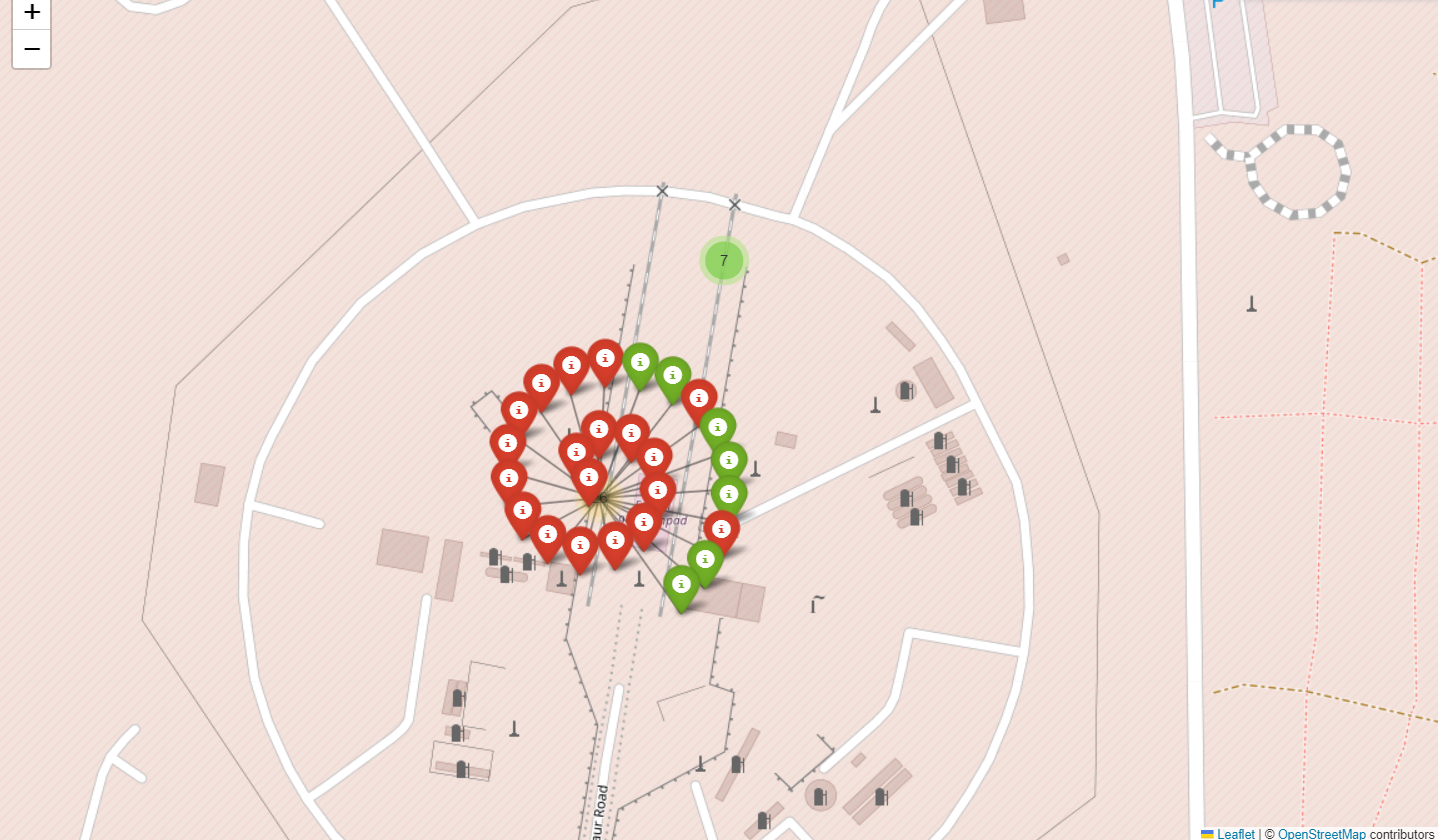

In [60]:
# Display the folium map image (for view in GitHub)
display(Image(filename='FoliumScreenshots/Screenshot 2024-08-07 131605.png'))

Now zoom in to a launch site and explore its proximity to see if you can easily find any railway, highway, coastline, etc. Move your mouse to these points and mark down their coordinates (shown on the top-left) in order to the distance to the launch site.


Now zoom in to a launch site and explore its proximity to see if you can easily find any railway, highway, coastline, etc. Move your mouse to these points and mark down their coordinates (shown on the top-left) in order to the distance to the launch site.


In [61]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

Let's mark down a point on the closest coastline using MousePosition and calculate the distance between the coastline point and the launch site.


In [62]:
# Coordinates of the coastline point
coastline_coords = [34.63341, -120.62628]

# Initialize the map
site_map = folium.Map(location=coastline_coords, zoom_start=15)

# Add markers for all launch sites
for index, row in spacex_df.iterrows():
    site_coords = [row['Lat'], row['Long']]
    folium.Marker(
        site_coords,
        icon=folium.Icon(color="red", icon="rocket"),
        popup=row['Launch Site']
    ).add_to(site_map)

# Create a marker for the coastline
folium.Marker(
    coastline_coords,
    icon=folium.Icon(color="blue", icon="info-sign"),
    popup="Coastline Point"
).add_to(site_map)

# Initialize the minimum distance and the closest launch site
min_distance = float('inf')
closest_launch_site = None
closest_coords = None

# Iterate over each launch site to find the closest one
for index, row in spacex_df.iterrows():
    launch_site_coords = (row['Lat'], row['Long'])
    distance = haversine(coastline_coords, launch_site_coords)

    if distance < min_distance:
        min_distance = distance
        closest_launch_site = row['Launch Site']
        closest_coords = [row['Lat'], row['Long']]

# Draw a line between the coastline point and the closest launch site
folium.PolyLine([coastline_coords, closest_coords], color="green", weight=2.5, opacity=1).add_to(site_map)

# Place a marker with the distance text at the midpoint of the line
midpoint = [(coastline_coords[0] + closest_coords[0]) / 2, (coastline_coords[1] + closest_coords[1]) / 2]

distance_marker = folium.Marker(
    midpoint,
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(75,18),
        html='<div style="font-size: 12; color:#d35400;"><b>%s KM</b></div>' % "{:10.2f}".format(min_distance),
    )
)
distance_marker.add_to(site_map)

# Display the map
site_map



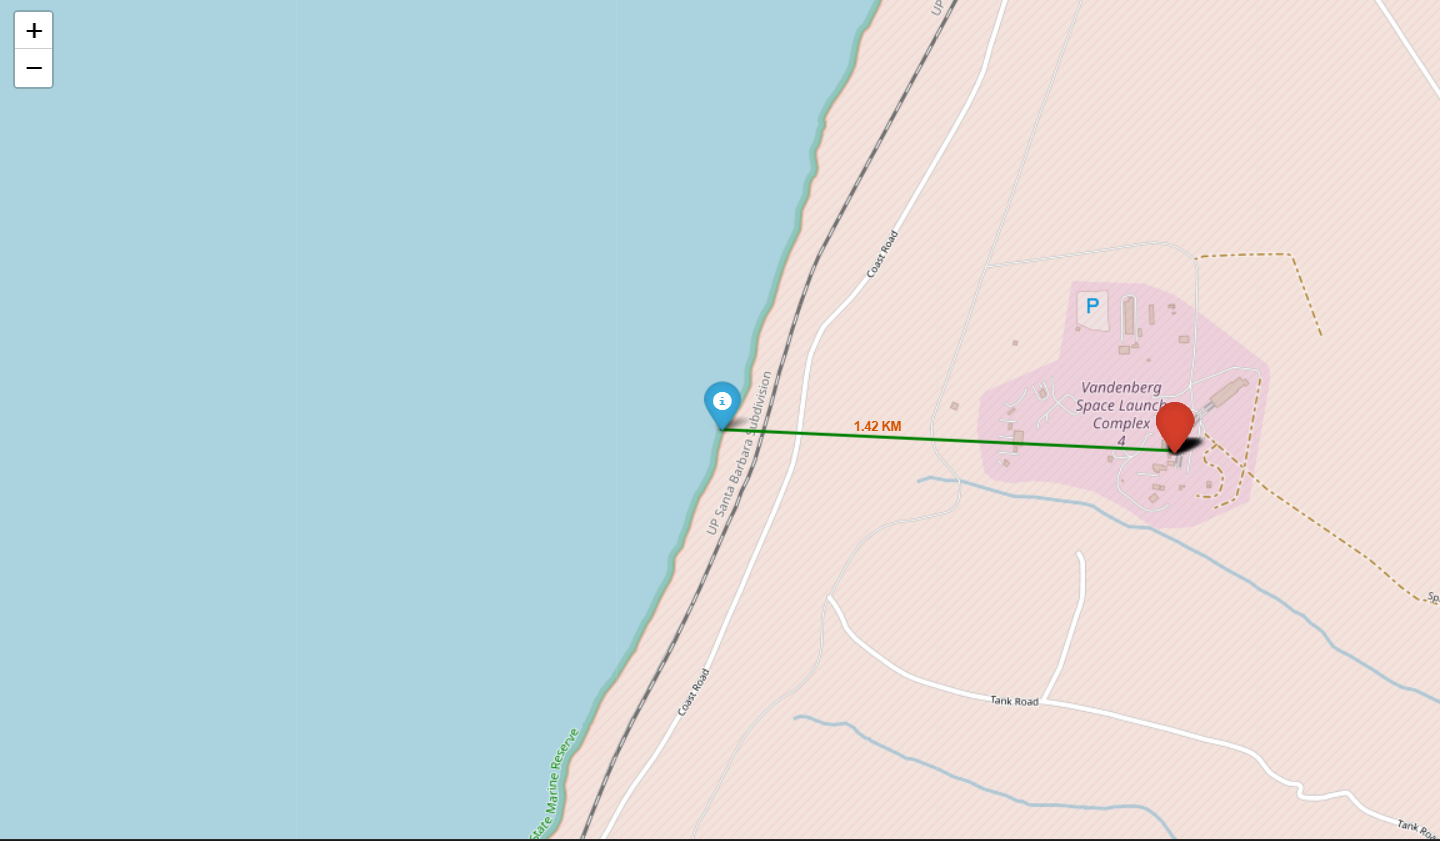

In [63]:
# Display the folium map image (for view in GitHub)
display(Image(filename='FoliumScreenshots/Screenshot 2024-08-07 131708.png'))

We can draw a `PolyLine` between a launch site to the selected coastline point


Your updated map with distance line should look like the following screenshot:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_distance.png">
</center>


Similarly, you can draw a line betwee a launch site to its closest city, railway, highway, etc. You need to use `MousePosition` to find the their coordinates on the map first


A railway map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/railway.png">
</center>


A highway map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/highway.png">
</center>


A city map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/city.png">
</center>


In [66]:
import folium
from folium.features import DivIcon
from haversine import haversine

# Coordinates of the coastline and city
coastline_coords = [34.63341, -120.62628]
city_coords = [34.63886, -120.4578]

# Initialize the map
site_map = folium.Map(location=city_coords, zoom_start=12)

# Add markers for all launch sites
for index, row in spacex_df.iterrows():
    site_coords = [row['Lat'], row['Long']]
    folium.Marker(
        site_coords,
        icon=folium.Icon(color="red", icon="rocket"),
        popup=row['Launch Site']
    ).add_to(site_map)

# Function to find the closest launch site and draw a line
def draw_line_and_marker(from_coords, color):
    min_distance = float('inf')
    closest_coords = None

    # Iterate over each launch site to find the closest one
    for index, row in spacex_df.iterrows():
        launch_site_coords = (row['Lat'], row['Long'])
        distance = haversine(from_coords, launch_site_coords)

        if distance < min_distance:
            min_distance = distance
            closest_coords = [row['Lat'], row['Long']]

    # Draw a line between the point and the closest launch site
    folium.PolyLine([from_coords, closest_coords], color=color, weight=2.5, opacity=1).add_to(site_map)

    # Place a marker with the distance text at the midpoint of the line
    midpoint = [(from_coords[0] + closest_coords[0]) / 2, (from_coords[1] + closest_coords[1]) / 2]
    folium.Marker(
        midpoint,
        icon=DivIcon(
            icon_size=(150,36),
            icon_anchor=(75,18),
            html='<div style="font-size: 12; color:#d35400;"><b>%s KM</b></div>' % "{:10.2f}".format(min_distance),
        )
    ).add_to(site_map)

# Draw line and marker for coastline
draw_line_and_marker(coastline_coords, "green")

# Draw line and marker for city
draw_line_and_marker(city_coords, "blue")

# Display the map
site_map


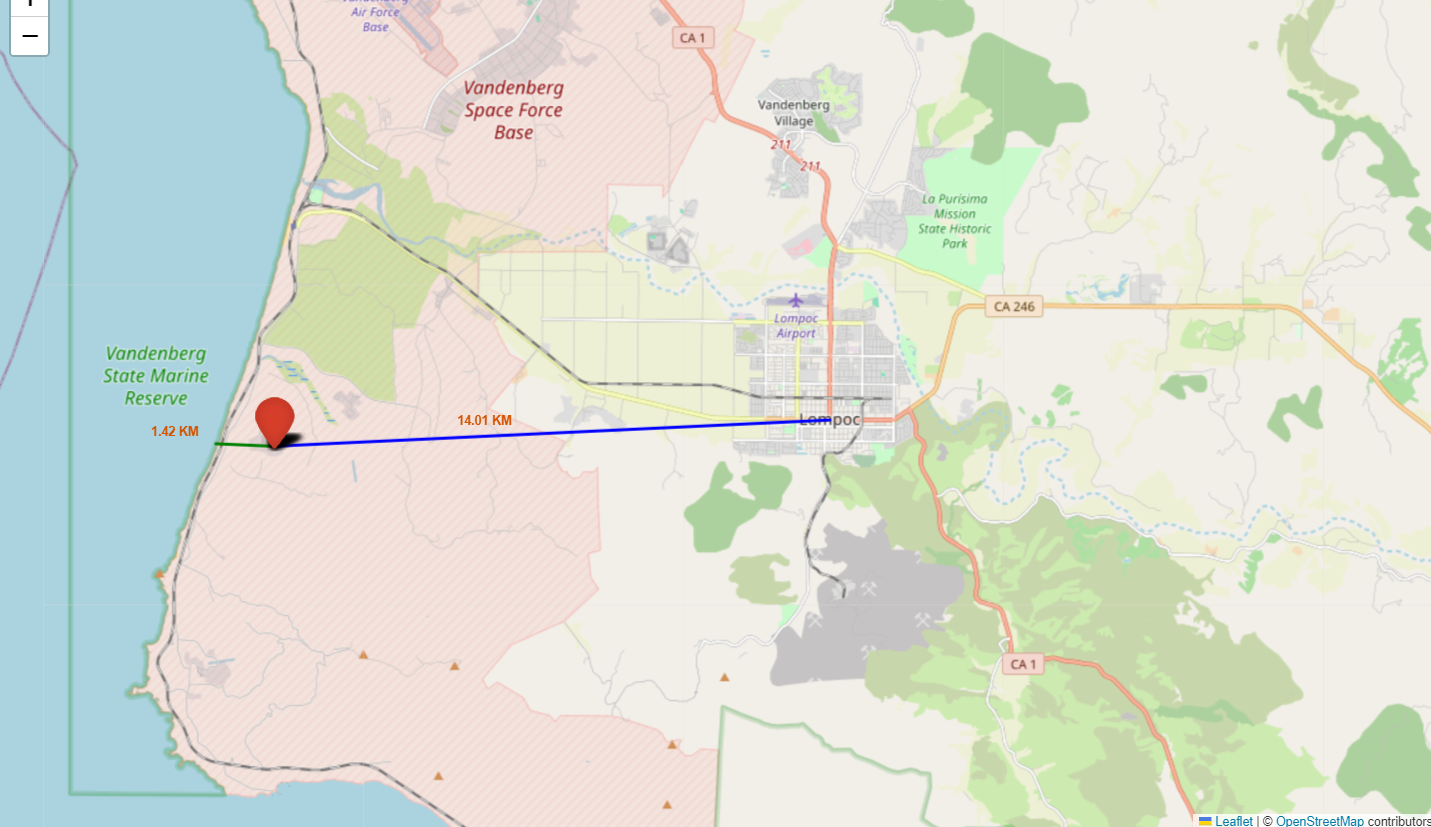

In [67]:
# Display the folium map image (for view in GitHub)
display(Image(filename='FoliumScreenshots/Screenshot 2024-08-07 131726.png'))

After you plot distance lines to the proximities, you can answer the following questions easily:

*   Are launch sites in close proximity to railways?
*   Are launch sites in close proximity to highways?
*   Are launch sites in close proximity to coastline?
*   Do launch sites keep certain distance away from cities?

Also please try to explain your findings.


# Next Steps:

Now you have discovered many interesting insights related to the launch sites' location using folium, in a very interactive way. Next, you will need to build a dashboard using Ploty Dash on detailed launch records.


## Authors


[Santiago Semensi](www.linkedin.com/in/santiago-semensi-513842228) Has a Bachelor's degree in Industrial Design, student of the IBM Data Science Professional Certificate program.

[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log 


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2024-02-24        | 1.1     | Santiago Semensi    | Completed the notebook, fulfilling and surpassing the course requirements |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
